In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

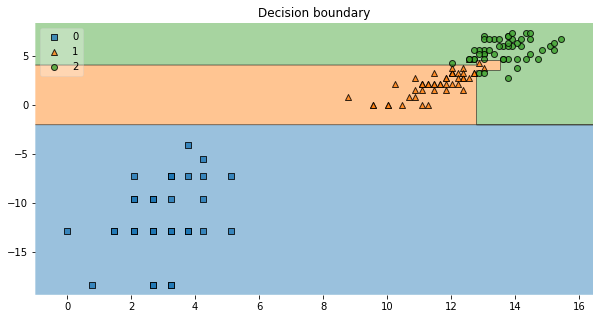

In [4]:
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
tree.fit(np.log(X ** 8), y)
fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=np.log(X ** 8), y=y, clf=tree, legend=2)
plt.title("Decision boundary")
plt.show()

In [5]:
import pandas as pd

breast_dt = pd.read_csv('./datasets/Breast.csv')
breast_dt.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# dataset = pd.DataFrame(scaler.fit_transform(breast_dt.values), columns=breast_dt.columns, index=breast_dt.index)

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(breast_dt, test_size=0.2, random_state=10)

In [8]:
import numpy as np

X_train = np.array(train[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin', 'MCP.1']].values)
y_train = np.array(train['Classification'].values)
X_test = np.array(test[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin', 'MCP.1']].values)
y_test = np.array(test['Classification'].values)

# Do wizualizacji granicy decyzyjnej używam tylko cech o indeksie 2 i 3 -> Glucose i Insulin
X2_train = np.array(train[['Glucose','Insulin']].values)
X2_test = np.array(test[['Glucose','Insulin']].values)

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = clf.predict(X_test)
print('Actual classes', y_test)
print('Predicted classes', y_pred)

Actual classes [1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1]
Predicted classes [1 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1]


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_ns = mean_squared_error(y_test, y_pred) 
print("Mean Square Error : %.2f " % mse_ns)

vs_ns = r2_score(y_test, y_pred)
print('Variance score: %.2f' % vs_ns)

Mean Square Error : 0.21 
Variance score: 0.17


In [12]:
#Decision tree params

criterion_config = ['gini', 'entropy']
splitter_config = ['best', 'random']
max_depth_config = [2, 4, 6, 8, 10, 15, 20]
min_samples_split_config = [2, 3, 4, 5]
min_samples_leaf_config = [1, 2, 3, 4]

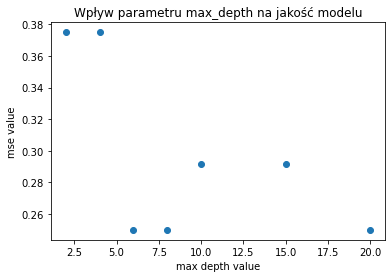

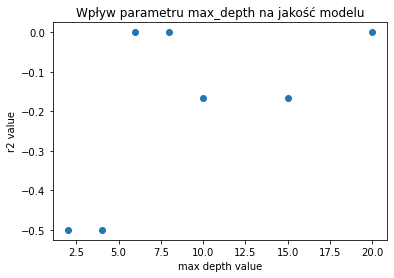

MSE scores  [0.375, 0.375, 0.25, 0.25, 0.2916666666666667, 0.2916666666666667, 0.25]
R2 scores  [-0.5, -0.5, 0.0, 0.0, -0.16666666666666674, -0.16666666666666674, 0.0]


In [13]:
res_max_depth_r2 = []
res_max_depth_mse = []

for md in max_depth_config:
    clf_max_depth = DecisionTreeClassifier(max_depth=md)
    clf_max_depth.fit(X_train, y_train)
    y_pred = clf_max_depth.predict(X_test)
    res_max_depth_mse.append(mean_squared_error(y_test, y_pred))
    res_max_depth_r2.append(r2_score(y_test, y_pred))

plt.scatter(max_depth_config, res_max_depth_mse)
plt.xlabel('max depth value')
plt.ylabel('mse value')
plt.title('Wpływ parametru max_depth na jakość modelu')
plt.show()
plt.clf()

plt.scatter(max_depth_config, res_max_depth_r2)
plt.xlabel('max depth value')
plt.ylabel('r2 value')
plt.title('Wpływ parametru max_depth na jakość modelu')
plt.show()

print('MSE scores ', res_max_depth_mse)
print('R2 scores ', res_max_depth_r2)

Powyższe wyniki pokazują, że zazwyczaj model wraz ze wzrostem wartości paramatru max_depth jakość modelu się poprawia (mse maleje, a wariancja rośnie)

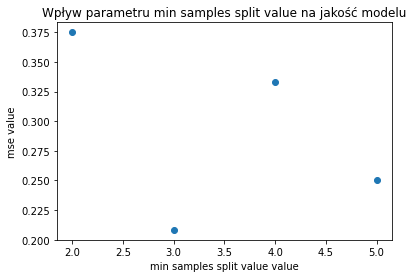

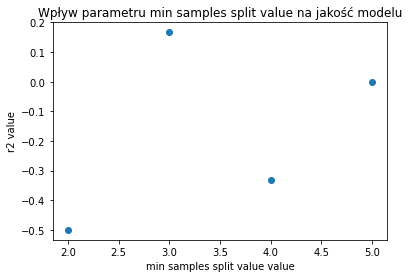

MSE scores  [0.375, 0.20833333333333334, 0.3333333333333333, 0.25]
R2 scores  [-0.5, 0.16666666666666663, -0.33333333333333326, 0.0]


In [14]:
res_min_samples_split_mse = []
res_min_samples_split_r2 = []

for mss in min_samples_split_config:
    clf_mss = DecisionTreeClassifier(min_samples_split=mss)
    clf_mss.fit(X_train, y_train)
    y_pred = clf_mss.predict(X_test)
    res_min_samples_split_mse.append(mean_squared_error(y_test, y_pred))
    res_min_samples_split_r2.append(r2_score(y_test, y_pred))

plt.scatter(min_samples_split_config, res_min_samples_split_mse)
plt.xlabel('min samples split value value')
plt.ylabel('mse value')
plt.title('Wpływ parametru min samples split value na jakość modelu')
plt.show()
plt.clf()

plt.scatter(min_samples_split_config, res_min_samples_split_r2)
plt.xlabel('min samples split value value')
plt.ylabel('r2 value')
plt.title('Wpływ parametru min samples split value na jakość modelu')
plt.show()

print('MSE scores ', res_min_samples_split_mse)
print('R2 scores ', res_min_samples_split_r2)

Powyższe wyniki pokazują, że im wyższy współczynnik min_samples_split tym jakość wytrenowanego modelu się pogarsza ( wyższe MSE oraz niższy r2)

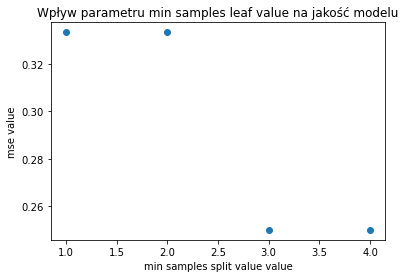

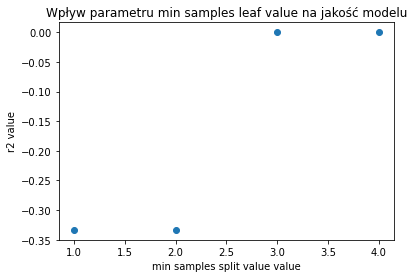

MSE scores  [0.3333333333333333, 0.3333333333333333, 0.25, 0.25]
R2 scores  [-0.33333333333333326, -0.33333333333333326, 0.0, 0.0]


In [15]:
res_min_samples_leaf_mse = []
res_min_samples_leaf_r2 = []

for msl in min_samples_leaf_config:
    clf_mss = DecisionTreeClassifier(min_samples_leaf=msl)
    clf_mss.fit(X_train, y_train)
    y_pred = clf_mss.predict(X_test)
    res_min_samples_leaf_mse.append(mean_squared_error(y_test, y_pred))
    res_min_samples_leaf_r2.append(r2_score(y_test, y_pred))

plt.scatter(min_samples_leaf_config, res_min_samples_leaf_mse)
plt.xlabel('min samples split value value')
plt.ylabel('mse value')
plt.title('Wpływ parametru min samples leaf value na jakość modelu')
plt.show()
plt.clf()

plt.scatter(min_samples_leaf_config, res_min_samples_leaf_r2)
plt.xlabel('min samples split value value')
plt.ylabel('r2 value')
plt.title('Wpływ parametru min samples leaf value na jakość modelu')
plt.show()

print('MSE scores ', res_min_samples_leaf_mse)
print('R2 scores ', res_min_samples_leaf_r2)

W tym przypadku dla różnych wartości parametru min_samples_leaf wyniki okazywały się różne ( model czasami się polepszał, czasami pogarszał), jednakże wydaje się że w ogólności wzrost wartości tego parametru może negatywnie wpływać na jakość modelu

In [16]:
max_depth_config = [2, 4, 6]
min_samples_split_config = [2, 3]
min_samples_leaf_config = [1, 2]

l_criterion = []
l_splitter = []
l_max_depth = []
l_min_samples_split = []
l_min_samples_leaf = []
l_mse = []
l_r2 = []

for c in criterion_config:
    for s in splitter_config:
        for md in max_depth_config:
            for mss in min_samples_split_config:
                for msl in min_samples_leaf_config:
                    clf_config = DecisionTreeClassifier(criterion=c, splitter=s, max_depth=md,
                                                        min_samples_split=mss, min_samples_leaf=msl)
                    clf_config.fit(X_train, y_train)
                    y_pred = clf_config.predict(X_test)
                    l_criterion.append(c)
                    l_splitter.append(s)
                    l_max_depth.append(md)
                    l_min_samples_split.append(mss)
                    l_min_samples_leaf.append(msl)
                    l_mse.append(mean_squared_error(y_test, y_pred))
                    l_r2.append(r2_score(y_test, y_pred))

d = {'Kryterium': l_criterion,
     'Splitter': l_splitter,
     'Max depth': l_max_depth,
     'Min samples split': l_min_samples_split,
     'Min samples leaf': l_min_samples_leaf, 
     'Błąd MSE': l_mse, 
     'Wynik wariancji': l_r2}
dataframe = pd.DataFrame(data = d)
dataframe

,Kryterium,Splitter,Max depth,Min samples split,Min samples leaf,Błąd MSE,Wynik wariancji
0,gini,best,2,2,1,0.375000,-0.500000
1,gini,best,2,2,2,0.375000,-0.500000
2,gini,best,2,3,1,0.375000,-0.500000
3,gini,best,2,3,2,0.375000,-0.500000
4,gini,best,4,2,1,0.250000,0.000000
5,gini,best,4,2,2,0.333333,-0.333333
6,gini,best,4,3,1,0.375000,-0.500000
7,gini,best,4,3,2,0.333333,-0.333333
8,gini,best,6,2,1,0.250000,0.000000
9,gini,best,6,2,2,0.291667,-0.166667


Najlepsze wyniki( najmniejszy mse i największy r2) zostały uzyskane za pomocą kryterium Gini'ego oraz splittera typu bes oraz min_sample_split = 2, min_sample_leaf=1

In [17]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
pred = clf.predict(X_test[0, :].reshape(1, -1))
print('Predykcja dla 1 elementu zbioru testowego\n', pred)
proba = clf.predict_proba(X_test[0, :].reshape(1, -1))
print('Prawdopodobieństwo przynależności do danej klasy dla 1 elementu zbioru testowego\n', proba)
print('Właściwa klasa -> ', y_test[0])

Predykcja dla 1 elementu zbioru testowego
 [1]
Prawdopodobieństwo przynależności do danej klasy dla 1 elementu zbioru testowego
 [[1. 0.]]
Właściwa klasa ->  1


Funkcja predict proba dla klasyfikatora zwaraca tablicę o wymiarze odpowiadającym ilości klas, wartość każdego elementu  z tablicy odpowiada prawdopodobieństwu przynależności do danej klasy zakres (0, 1)

In [19]:
pred = clf.predict(X_test[4, :].reshape(1, -1))
print('Predykcja dla 5 elementu zbioru testowego\n', pred)
proba = clf.predict_proba(X_test[4, :].reshape(1, -1))
print('Prawdopodobieństwo przynależności do danej klasy dla 5 elementu zbioru testowego\n', proba)
print('Właściwa klasa -> ', y_test[4])

Predykcja dla 5 elementu zbioru testowego
 [2]
Prawdopodobieństwo przynależności do danej klasy dla 5 elementu zbioru testowego
 [[0. 1.]]
Właściwa klasa ->  2


In [20]:
pred = clf.predict(X_test[23, :].reshape(1, -1))
print('Predykcja dla 24 elementu zbioru testowego\n', pred)
proba = clf.predict_proba(X_test[23, :].reshape(1, -1))
print('Prawdopodobieństwo przynależności do danej klasy dla 24 elementu zbioru testowego\n', proba)
print('Właściwa klasa -> ', y_test[23])

Predykcja dla 24 elementu zbioru testowego
 [1]
Prawdopodobieństwo przynależności do danej klasy dla 24 elementu zbioru testowego
 [[1. 0.]]
Właściwa klasa ->  1


In [21]:
print('Predykcje dla wszystkich próbek ze zbioru testowego')
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)
print('Predicions\n', preds)
print('Probabilities\n', probs)
print(y_test)

Predykcje dla wszystkich próbek ze zbioru testowego
Predicions
 [1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 1 1 2 2 2 2 1]
Probabilities
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 2 2 1 1]


In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X2_train, y_train)

DecisionTreeClassifier()

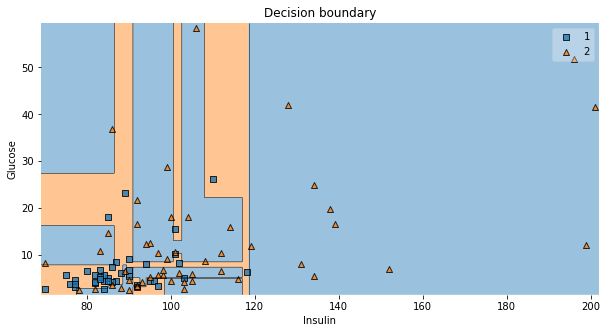

In [23]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
labels = ['Decision Tree']
fig = plot_decision_regions(X=X2_train, y=y_train, clf=clf, legend=1)
plt.title("Decision boundary")
plt.xlabel("Insulin")
plt.ylabel("Glucose")
plt.show()

Można ocenić, że w tym przypadku ze względu na bardzo duże zagęszczenie większości próbek w jednym miejscu, które należą do różnych klas trudno dokładnie wyznaczyć granicę decyzyjną. Ogólnie wydaje się że granica została wyznaczona prawidłowo.